In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.masks import extract_masks, binarize, resample_mask
from utils.images import normalize, resample_img
from utils.registration import est_lin_transf, apply_lin_transf, est_nl_transf, apply_nl_transf, seg_atlas
from utils.plot_methods import plot_transf, plot_atlas_seg

## Project 2

### Task 1 Atlas Creation

In [2]:
## Extract masks for common dataset

# Lists of masks
masks = ['./data/common_40_mask.nii.gz',
         './data/common_41_mask.nii.gz',
         './data/common_42_mask.nii.gz']

# Left femur - label 2, Left hip bone - label 4
labels = [2,4] 

# Extract masks
extract_masks(masks, labels)

The new mask is saved as './data/common_40_mask_4_2.nii.gz'.
The new mask is saved as './data/common_41_mask_4_2.nii.gz'.
The new mask is saved as './data/common_42_mask_4_2.nii.gz'.


Text(0.5, 1.0, 'Image and the new mask')

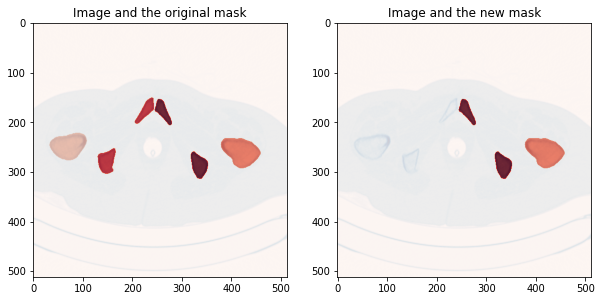

In [3]:
## Plot the extracted masks for one subject

# Load images
fix_img = sitk.ReadImage('./data/common_42_image.nii.gz', sitk.sitkFloat32)
fix_mask = sitk.ReadImage('./data/common_42_mask.nii.gz', sitk.sitkFloat32)
mask_new = sitk.ReadImage('./data/common_42_mask_4_2.nii.gz', sitk.sitkFloat32)

fix_img_data = sitk.GetArrayFromImage(fix_img)
fix_mask_data = sitk.GetArrayFromImage(fix_mask)
mask_new_data = sitk.GetArrayFromImage(mask_new)

# Plot original masks and extracted masks
idx = 30
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the original mask')

plt.subplot(122)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(mask_new_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the new mask')

### Task 3 Atlas based-segmentation: (40%)

In [2]:
# Initialize the inputs
fix_imgs_paths = ['./data/common_40_image.nii.gz',
                  './data/common_41_image.nii.gz',
                  './data/common_42_image.nii.gz']

# Masks of left femur and hip bones
fix_masks_paths = ['./data/common_40_mask_4_2.nii.gz',
                   './data/common_41_mask_4_2.nii.gz',
                   './data/common_42_mask_4_2.nii.gz']

# Full masks
fix_full_masks_paths = ['./data/common_40_mask.nii.gz',
                    './data/common_41_mask.nii.gz',
                    './data/common_42_mask.nii.gz']

# Moving images
mov_imgs_paths = ['./data/g1_53_image.nii.gz',
                  './data/g1_54_image.nii.gz',
                  './data/g1_55_image.nii.gz']
# Masks of moving images
mov_masks_paths = ['./data/g1_53_mask_4_2.nii.gz',
                  './data/g1_54_mask_4_2.nii.gz',
                  './data/g1_55_mask_4_2.nii.gz']
    

#### Linear Registration

--------
Linear registration:
Final mean squares value: 120079.41999703231
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 52.
Number of iterations: 52
--------


/Users/xinyi/Documents/GitHub/Segmentationof-pelvic-bone-in-CT/utils/plot_methods.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


--------
Linear registration:
Final mean squares value: 129667.07114895967
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 48.
Number of iterations: 48
--------
--------
Linear registration:
Final mean squares value: 139219.8458343467
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 49.
Number of iterations: 49
--------


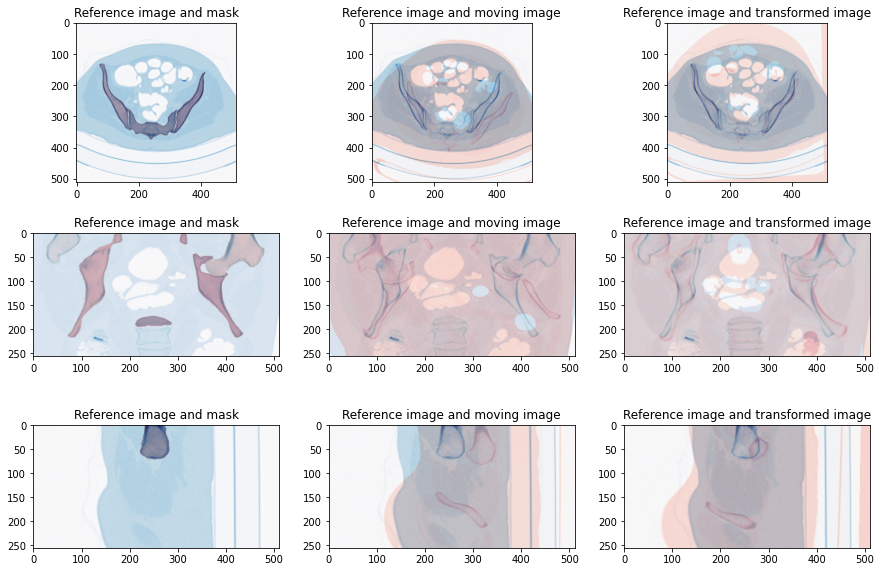

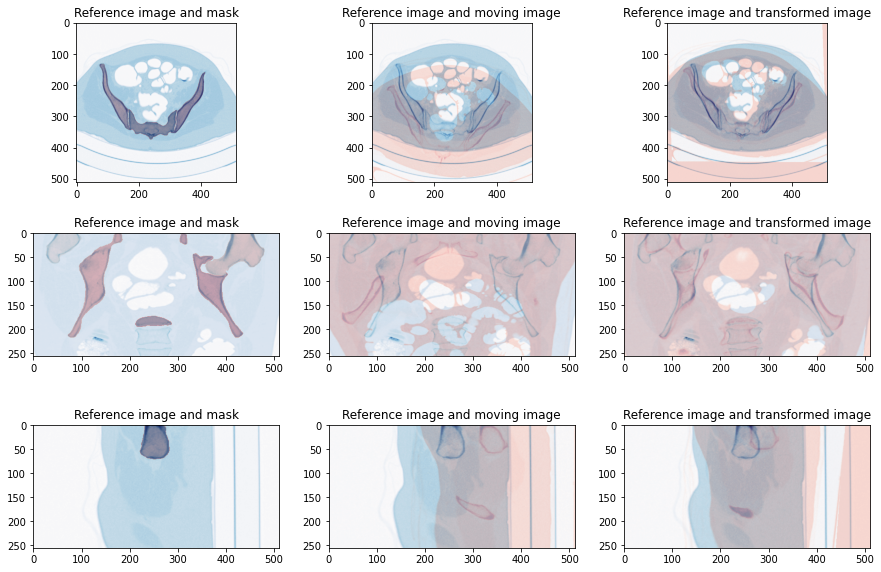

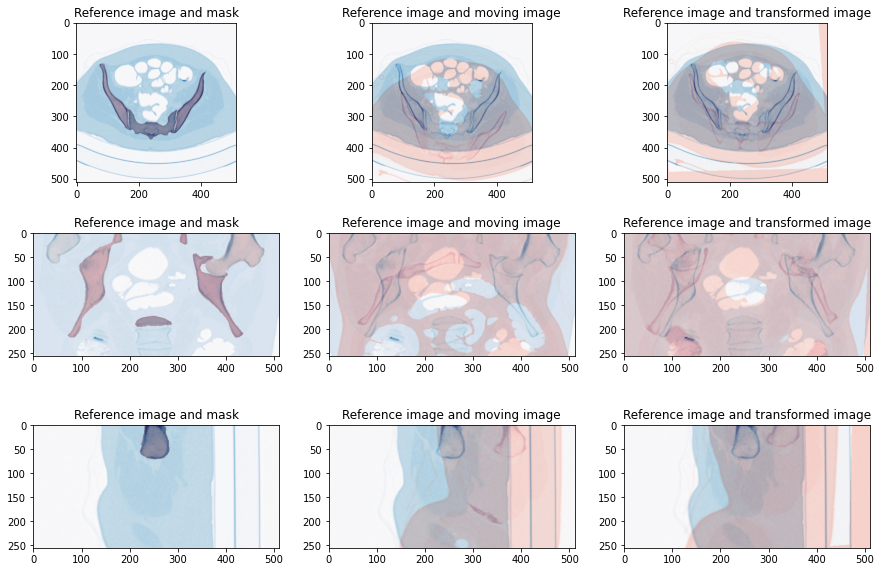

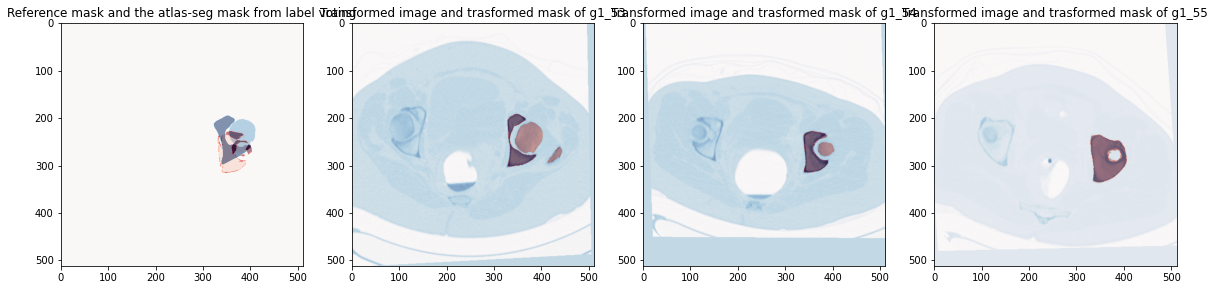

--------
Linear registration:
Final mean squares value: 156918.07750886053
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 41.
Number of iterations: 41
--------
--------
Linear registration:
Final mean squares value: 168292.6449538667
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Number of iterations: 24
--------
--------
Linear registration:
Final mean squares value: 185734.91065325396
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 39.
Number of iterations: 39
--------


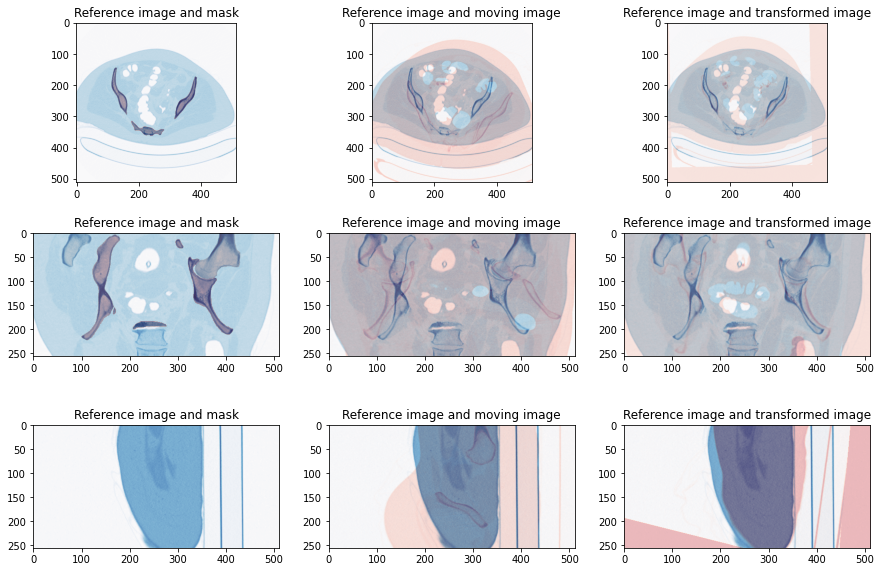

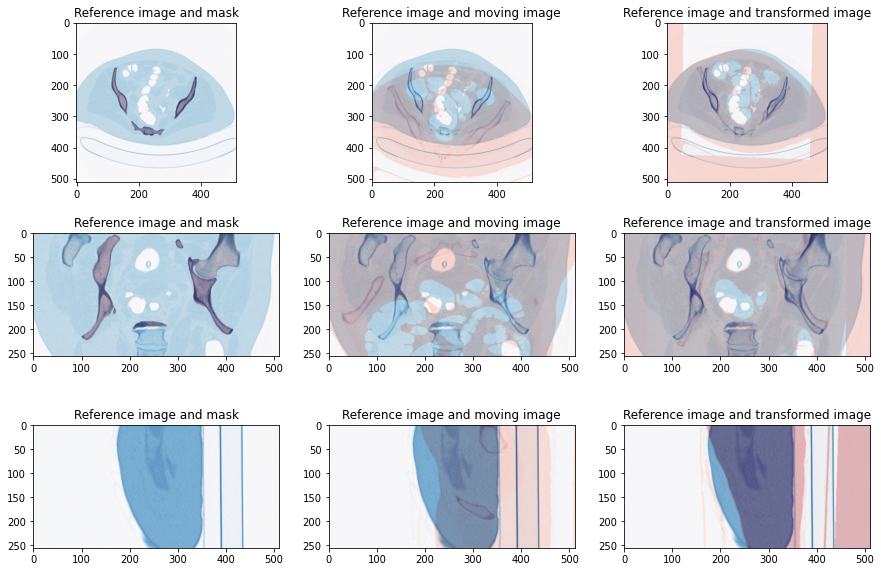

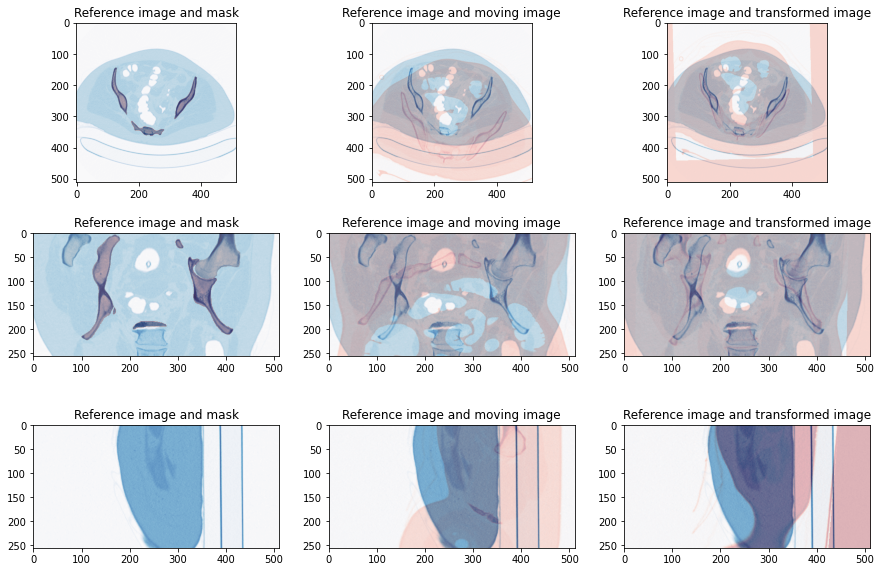

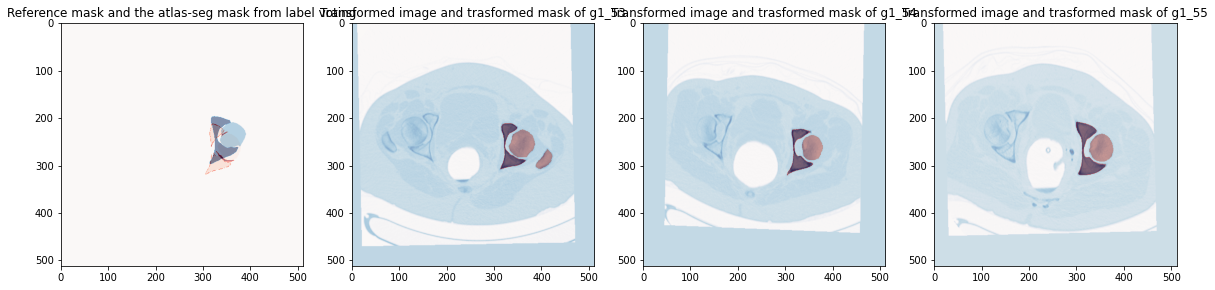

--------
Linear registration:
Final mean squares value: 119055.97894824739
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Number of iterations: 13
--------
--------
Linear registration:
Final mean squares value: 120602.23161787089
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Number of iterations: 31
--------
--------
Linear registration:
Final mean squares value: 155015.36656662283
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Number of iterations: 19
--------


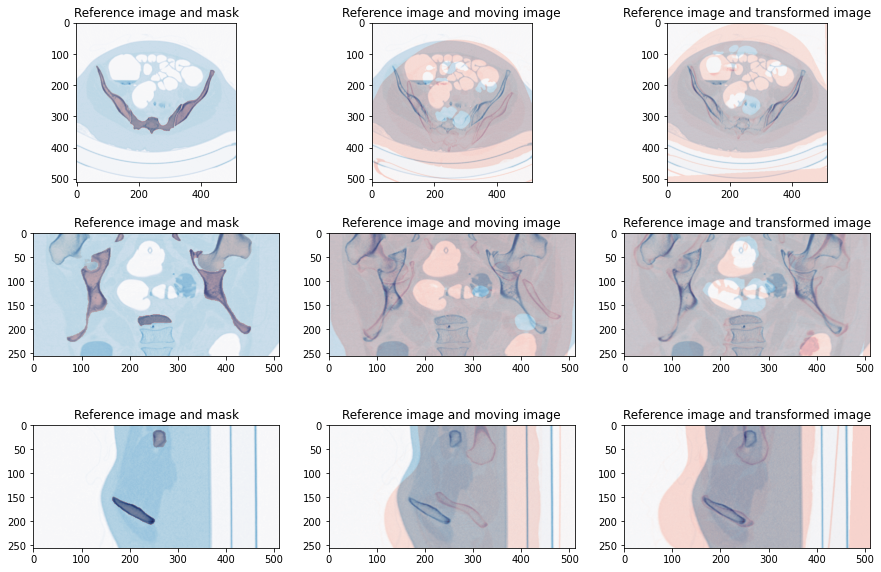

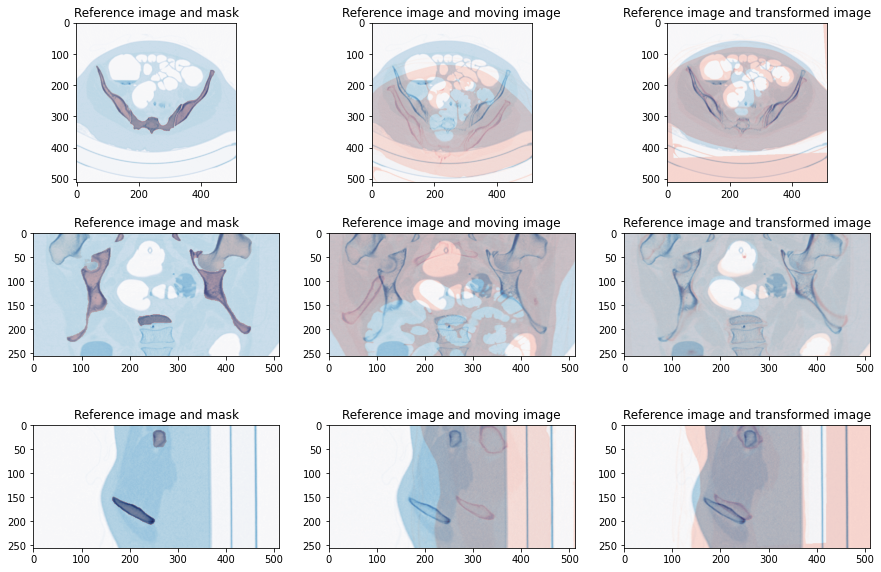

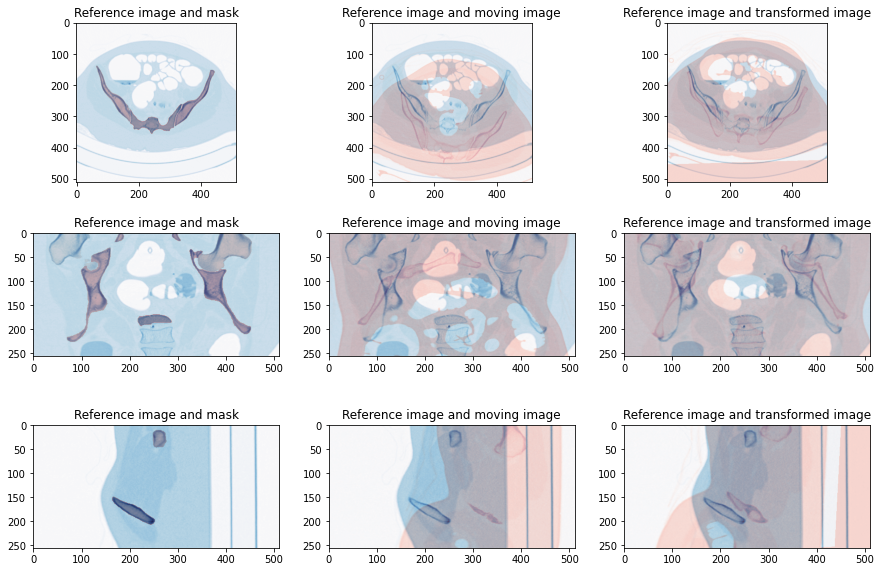

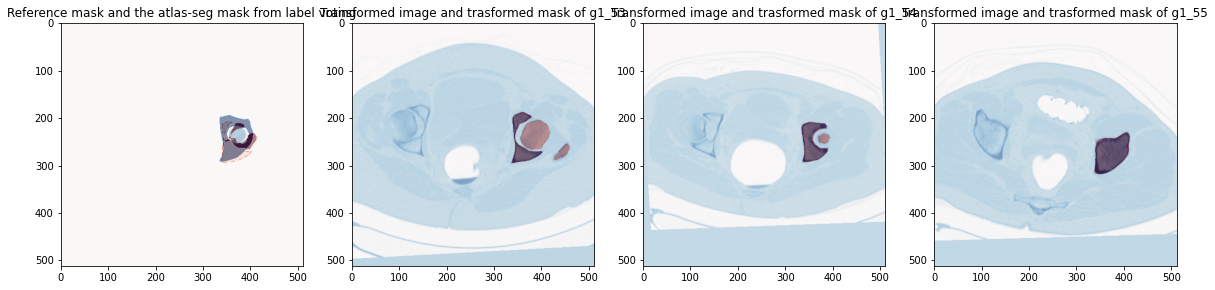

In [3]:
# If resample and normalize the images to be in the same size
resmaple = True
normal = False

for i in range(len(fix_imgs_paths)):

    lin_masks = []
    lin_imgs = []

    # Load reference image and mask
    fix_img = sitk.ReadImage(fix_imgs_paths[i], sitk.sitkFloat32)
    fix_mask = sitk.ReadImage(fix_full_masks_paths[i], sitk.sitkFloat32)
    fix_mask_left = sitk.ReadImage(fix_masks_paths[i], sitk.sitkFloat32)
    
    for j in range(len(mov_imgs_paths)):
        # Load moving image and mask
        mov_img = sitk.ReadImage(mov_imgs_paths[j], sitk.sitkFloat32)
        mov_mask = sitk.ReadImage(mov_masks_paths[j], sitk.sitkFloat32)

        # Resample the images to be the same size
        # Normalize the images
        # Binarize the mask
        if resmaple:
            fix_img = resample_img(fix_img, out_size= [512,512,256])
            fix_mask = resample_mask(fix_mask, out_size= [512,512,256])
            fix_mask_left = resample_mask(fix_mask_left, out_size= [512,512,256])
            mov_img = resample_img(mov_img, out_size= [512,512,256])
            mov_mask = resample_mask(mov_mask, out_size= [512,512,256])

        if normal:
            fix_img = normalize(fix_img)
            mov_img = normalize(mov_img)

        # Estimate Linear Registration
        lin_tranf = est_lin_transf(fix_img, fix_mask, mov_img)

        # Apply Registration to the moving image and mask
        mov_img_resampled = apply_lin_transf(fix_img, mov_img, lin_tranf)
        mov_mask_resampled = apply_lin_transf(fix_img, mov_mask, lin_tranf)
        lin_imgs.append(mov_img_resampled)
        lin_masks.append(sitk.Cast(mov_mask_resampled,sitk.sitkUInt8))

        # Plot the results
        x,y,z = 140, 250, 450
        plot_transf(fix_img, fix_mask, mov_img, mov_img_resampled, x, y, z)

    # Apply atlas segmentation and save the image
    est_lin_mask = seg_atlas(lin_masks)
    est_lin_mask_path = './output/' + fix_full_masks_paths[i].split("data/")[1].replace("mask.nii.gz","lin_est_mask.nii.gz")
    sitk.WriteImage(est_lin_mask, est_lin_mask_path)

    # Plot the atlas segmentation results
    idx = 80
    plot_atlas_seg(est_lin_mask, fix_mask_left, lin_imgs, lin_masks, idx)
        

### Task 4 Accuracy assessment: (10%)

In [4]:
# Define assesment method
def AccuracyAssess(ref, pred):

    labelTrue=ref
    labelPred=pred
    
    diceCoeff=sitk.LabelOverlapMeasuresImageFilter()
    diceCoeff.Execute(labelTrue>0.5,labelPred>0.5)

    hausDist=sitk.HausdorffDistanceImageFilter()
    hausDist.Execute(labelTrue>0.5,labelPred>0.5)

    print("Dice coefficient equal to ", diceCoeff.GetDiceCoefficient(), "; Hausdorff distance equal to ",  hausDist.GetHausdorffDistance())

In [5]:
id_list = [40,41,42]
for i in id_list:
    gt = sitk.ReadImage('./data/common_{}_mask_4_2.nii.gz'.format(i), sitk.sitkFloat32)
    est_mask = sitk.ReadImage('./output/common_{}_lin_est_mask.nii.gz'.format(i), sitk.sitkFloat32)
    gt = resample_mask(gt, out_size= [512,512,256])
    print("Evaluation of the masks for comman {} :".format(i))
    AccuracyAssess(gt, sitk.Cast(est_mask,sitk.sitkUInt8))

Evaluation of the masks for comman 40 :
Dice coefficient equal to  0.43861001920669895 ; Hausdorff distance equal to  31.091833359614114
Evaluation of the masks for comman 41 :
Dice coefficient equal to  0.46805187425905836 ; Hausdorff distance equal to  24.84620744919827
Evaluation of the masks for comman 42 :
Dice coefficient equal to  0.646146288222256 ; Hausdorff distance equal to  21.598898236958693
